## HeartFailure data preprocessing

### Importing necessary libraries

In [1]:
import os
import sys
current_directory=os.getcwd()
parent_directory=os.path.dirname(current_directory)
sys.path.append(parent_directory)


In [2]:
import numpy as np
from library.generators.NextConvGeN import NextConvGeN


2024-01-31 12:01:51.405585: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-31 12:01:51.405605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
from fdc.clustering import *

In [4]:
import pandas as pd

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Importing data

In [6]:
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [7]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
np.random.seed(42)
data=data.sample(frac=1)

In [9]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data['Gender'].replace(['Female', 'Male'],[0,1],inplace=True)

In [11]:
data.family_history_with_overweight.unique()

array(['yes', 'no'], dtype=object)

In [12]:
data['family_history_with_overweight'].replace(['yes', 'no'],[1,0],inplace=True)

In [13]:
data.FAVC.unique()

array(['yes', 'no'], dtype=object)

In [14]:
data['FAVC'].replace(['yes', 'no'],[1,0],inplace=True)

In [15]:
data.CAEC.unique()

array(['Frequently', 'Sometimes', 'Always', 'no'], dtype=object)

In [16]:
data['CAEC'].replace(['Sometimes', 'Frequently', 'Always', 'no'],[1,2,3,0],inplace=True)

In [17]:
data.SMOKE.unique()

array(['no', 'yes'], dtype=object)

In [18]:
data['SMOKE'].replace(['yes', 'no'],[1,0],inplace=True)

In [19]:
data.SCC.unique()

array(['no', 'yes'], dtype=object)

In [20]:
data['SCC'].replace(['yes', 'no'],[1,0],inplace=True)

In [21]:
data.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [22]:
data['CALC'].replace(['Sometimes', 'Frequently', 'Always', 'no'],[1,2,3,0],inplace=True)

In [23]:
data.MTRANS.unique()

array(['Public_Transportation', 'Automobile', 'Bike', 'Walking',
       'Motorbike'], dtype=object)

In [24]:
data['MTRANS'].replace(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike'],[0,1,2,3,4],inplace=True)

In [25]:
data.NObeyesdad.unique()

array(['Insufficient_Weight', 'Obesity_Type_III', 'Normal_Weight',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Overweight_Level_II'], dtype=object)

In [26]:
data['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III'],[0,1,2,3,4,5,6],inplace=True)

In [27]:
cont_list=['Age', 'Height', 'Weight' ]

nom_list=['Gender', 'MTRANS','FAVC','SMOKE']

ord_list=['family_history_with_overweight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC','SCC']

target = ['NObeyesdad']


In [28]:
data[nom_list]=data[nom_list].astype('int64')
data[ord_list]=data[ord_list].astype('int64')

In [29]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [30]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/Obesity.csv")
data.to_csv(output_file_path, index=False)

In [31]:
data['NObeyesdad'].value_counts()

4    351
6    324
5    297
3    290
1    282
2    276
0    267
Name: NObeyesdad, dtype: int64

In [32]:
data.drop(['NObeyesdad'],axis=1, inplace=True)

In [33]:
np.random.seed(42)
data=data.sample(frac=1)

### UMAP on entire data

In [34]:
from fdc.fdc import feature_clustering

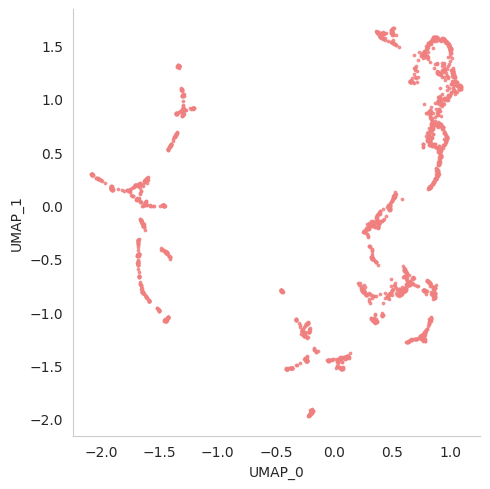

In [35]:
np.random.seed(42)
umap_emb=feature_clustering(30,0.1,'euclidean',data,True)

### Feature-type Distributed Clustering (FDC)

In [36]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/Obesity.json")

In [37]:
import json

features = {
    "cont_list": cont_list,
    "nom_list": nom_list,
    "ord_list": ord_list,
    "target": target
}

with open(output_file_path, "w") as json_file:
    json.dump(features, json_file)

FDC.normalize (init): 0.00001 / 0.000s


FDC.normalize (clustering CONT): 6.55955 / 6.560s


FDC.normalize (clustering ORD): 13.63316 / 20.193s
FDC.normalize (clustering NOM): 0.00005 / 20.193s
FDC.normalize (concat): 0.00003 / 20.193s


FDC.normalize (umap 5 -> 2): 7.05628 / 27.249s
FDC.normalize (array -> DataFrame): 0.00026 / 27.249s


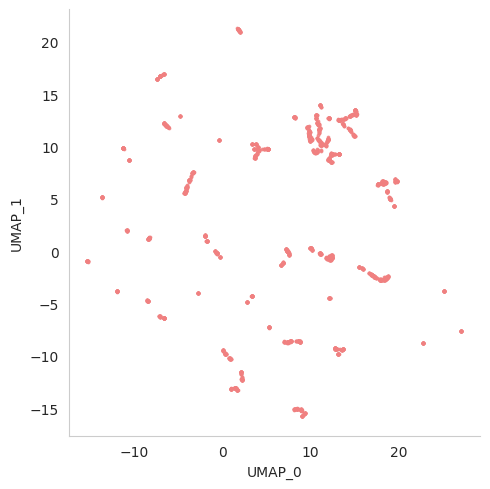

FDC.normalize (plotting): 0.39535 / 27.645s
FDC.normalize (array -> DataFrame): 0.00017 / 27.645s
FDC.normalize (total): 0.00001 / 27.645s


In [38]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)

fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,cont_list=cont_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### Clustering using K-means

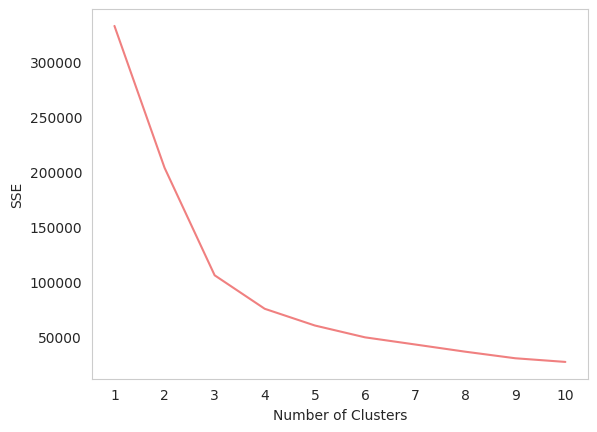

In [39]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(FDC_emb_low)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [40]:
def find_optimal_cluster(FDC_emb_low):
    silhouette_scores = []

    for n_clusters in list(range(2, 9)):
        km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)

        km.fit(FDC_emb_low)

        labels = km.labels_

        # Compute the silhouette score
        silhouette_avg = silhouette_score(FDC_emb_low, labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

In [41]:
find_optimal_cluster(FDC_emb_low)

[0.40364823,
 0.49932793,
 0.4855681,
 0.48562372,
 0.49968654,
 0.51280916,
 0.54165787]

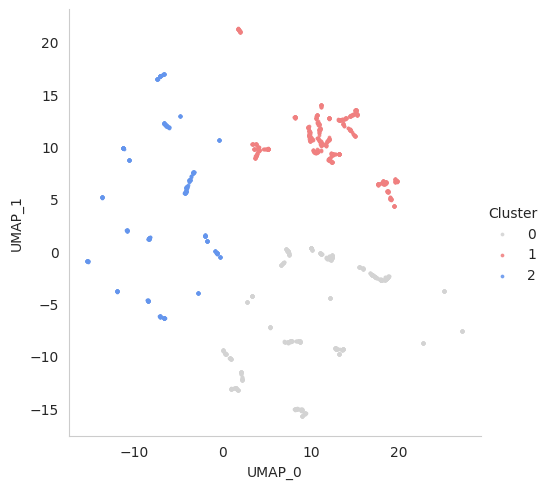

In [42]:
from fdc.clustering import *
np.random.seed(42)
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(3)

In [43]:
cluster_counts

array([790, 835, 462])

In [44]:
data['Target']=cluster_list

In [45]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/SSObesity.csv")
data.to_csv(output_file_path, index=False)

In [46]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Target
1313,0,18.000000,1.630000,63.000000,1,1,1,3,1,0,2,0,2,2,1,0,1
1739,0,22.847618,1.669136,85.568385,1,1,2,1,1,0,2,0,0,1,0,0,0
382,0,18.530840,1.573816,39.850137,0,1,1,1,1,0,1,0,0,2,1,0,1
584,0,25.999636,1.610126,102.686908,1,1,3,3,1,0,1,0,0,1,1,0,2
1711,1,27.000000,1.930000,102.000000,1,1,2,1,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,26.208134,1.700000,78.041338,1,1,2,3,1,0,2,0,0,0,2,2,0
1095,0,21.000000,1.754497,77.956921,1,1,2,2,1,0,1,0,0,1,1,0,0
1130,1,23.254934,1.847530,122.062610,1,1,3,2,1,0,1,0,0,0,1,0,2
1294,0,40.000000,1.561109,62.871794,1,1,2,3,1,0,2,0,0,0,1,2,1
